# Simulación: Picas y Fijas

##### Douglas Andrés Ramírez Brujés - 2150436
###### Marianne Solangel Rojas Robles - 2150286

In [1]:
import random
import itertools as it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.__version__

numeros = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

### Métodos

In [2]:
#Define un codigo de n cifras no repetidas al azar
def crearCod(n):
    codigo = ''
    for i in range (n):
        num_elegido = random.choice(numeros)
        while num_elegido in codigo:
            num_elegido = random.choice(numeros)
        codigo = codigo + num_elegido
    return codigo

#Escoje una opción random de una lista de iteraciones
def elejirProp(codigo, listado):
    return random.choice(listado)

#Crea lista con todas las iteraciones de n cifras en numeros()
def crearComb(n): 
    return [''.join(i) for i in it.permutations(numeros,n)]

#revisa las picas y fijas entre codigo y prop
def comprobar(codigo, prop):
    picas, fijas = 0, 0
    for j in range(len(codigo)):
        if(prop[j] == codigo[j]):
            fijas += 1
        elif prop[j] in codigo:
            picas += 1
    return (picas, fijas)

### Juega con el usuario: Usuario adivina el número

In [14]:
codigo = crearCod(4)
intentos = 0
fijas = 0
#print('Número a adivinar: %s' % codigo)
while (fijas != len(codigo)):
    print('Escoja una cifra de %s cifras no repetidas' % len(codigo))
    #prop = raw_input() #Python 2
    prop = str(input()) #Python 3
    prop = str(prop)
    if(prop=="0000"):
        break
    picas, fijas = comprobar(codigo, prop)
    intentos = intentos+1
    print('Tu propuesta', prop, 'tiene', picas, 'picas y', fijas, 'fijas')
if(prop!="0000"):
    print('Felicidades. El número es:%s. Intentos:%i' % (codigo, intentos))
else:
    print('Decepcionante. El código es:%s'%codigo)

Escoja una cifra de 4 cifras no repetidas
0000
Decepcionante. El código es:7509


### Juega contra el computador: El computador adivinará el número

In [5]:
print('Escoja un número para que el computador lo adivine:')
codigo = str(input())
def adivinaPausado():    
    listado = crearComb(4)
    intentos = 0
    picas,fijas = 0,0
    while(fijas != len(codigo)):
        prop = elejirProp(codigo,listado)
        print ("\nSi le da pereza pensar, el número de picas y fijas es, respectivamente: "+str(comprobar(codigo,prop)))
        print ("Supongo que el número es: "+prop)
        print ("¿Cuántas picas obtuve, humano?")
        picas = int(input())
        print ("¿Cuántas fijas obtuve, humano?")
        fijas = int(input())        
        listado = [i for i in listado if comprobar(i, prop) == (picas,fijas)]
        intentos+=1
    print("\nTal parece que gané en "+str(intentos)+" intentos, fácil.")
adivinaPausado()

Escoja un número para que el computador lo adivine:
1234

Si le da pereza pensar, el número de picas y fijas es, respectivamente: (1, 0)
Supongo que el número es: 6359
¿Cuántas picas obtuve, humano?
1
¿Cuántas fijas obtuve, humano?
0

Si le da pereza pensar, el número de picas y fijas es, respectivamente: (1, 0)
Supongo que el número es: 0792
¿Cuántas picas obtuve, humano?
1
¿Cuántas fijas obtuve, humano?
0

Si le da pereza pensar, el número de picas y fijas es, respectivamente: (1, 0)
Supongo que el número es: 4085
¿Cuántas picas obtuve, humano?
1
¿Cuántas fijas obtuve, humano?
0

Si le da pereza pensar, el número de picas y fijas es, respectivamente: (1, 2)
Supongo que el número es: 1246
¿Cuántas picas obtuve, humano?
1
¿Cuántas fijas obtuve, humano?
2

Si le da pereza pensar, el número de picas y fijas es, respectivamente: (2, 0)
Supongo que el número es: 7146
¿Cuántas picas obtuve, humano?
2
¿Cuántas fijas obtuve, humano?
0

Si le da pereza pensar, el número de picas y fijas es, re

### Modo simulación

#### Una vez

In [4]:
def adivina():
    n, intentos = 4, 0
    picas, fijas = 0, 0
    listado = crearComb(n)
    codigo = crearCod(n)
    #print('Número a adivinar: %s' % codigo)
    while(fijas != n):
        prop = elejirProp(codigo, listado)
        picas, fijas = comprobar(codigo, prop)
        listado = [i for i in listado if comprobar(i, prop) == comprobar(codigo, prop)]
        #print('%i. El numero propuesto es %s y tiene %i picas y %i fijas.' % (intentos, prop, picas, fijas))
        intentos += 1
    #print('\nEl numero es %s y se adivinó en %i intentos.' % (prop, intentos))
    return prop, intentos

print('\nRespuesta: %s\nIntentos: %s' % adivina())


Respuesta: 7653
Intentos: 6


#### Varias veces

          Cantidad
Intentos          
3                8
4               10
5               39
6               28
7               11
Total:          100

Promedio de intentos: 5.360 



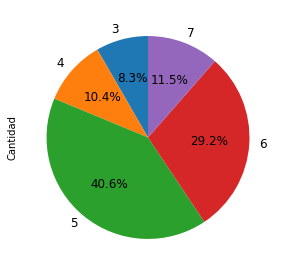

In [6]:
inten = []
for i in range(100):
    respuesta, intentos = adivina()
    inten.append(intentos)
    
intenIndex = [i for i in range(np.array(inten).max()) if i in inten]
cantidad = [inten.count(i) for i in intenIndex]
tablaResultados = pd.DataFrame({'Intentos':intenIndex, 'Cantidad':cantidad})
tabla = tablaResultados.groupby('Intentos').agg('max')

print(tabla)
print('Total:          %i\n' % len(inten))
print('Promedio de intentos: %.3f \n' % (np.mean(np.array(inten))))

plt.figure(figsize=(10,10))
ax1 = plt.subplot(122, aspect='equal')
tablaResultados.plot(kind='pie', y = 'Cantidad', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=tablaResultados['Intentos'], legend = False, fontsize=12);